In [5]:
!pip3 install pm4py

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [6]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
import pandas as pd

# Load the event log
log = xes_importer.apply('log_without_srm.xes')

parsing log, completed traces :: 100%|██████████| 250045/250045 [00:50<00:00, 4929.64it/s]


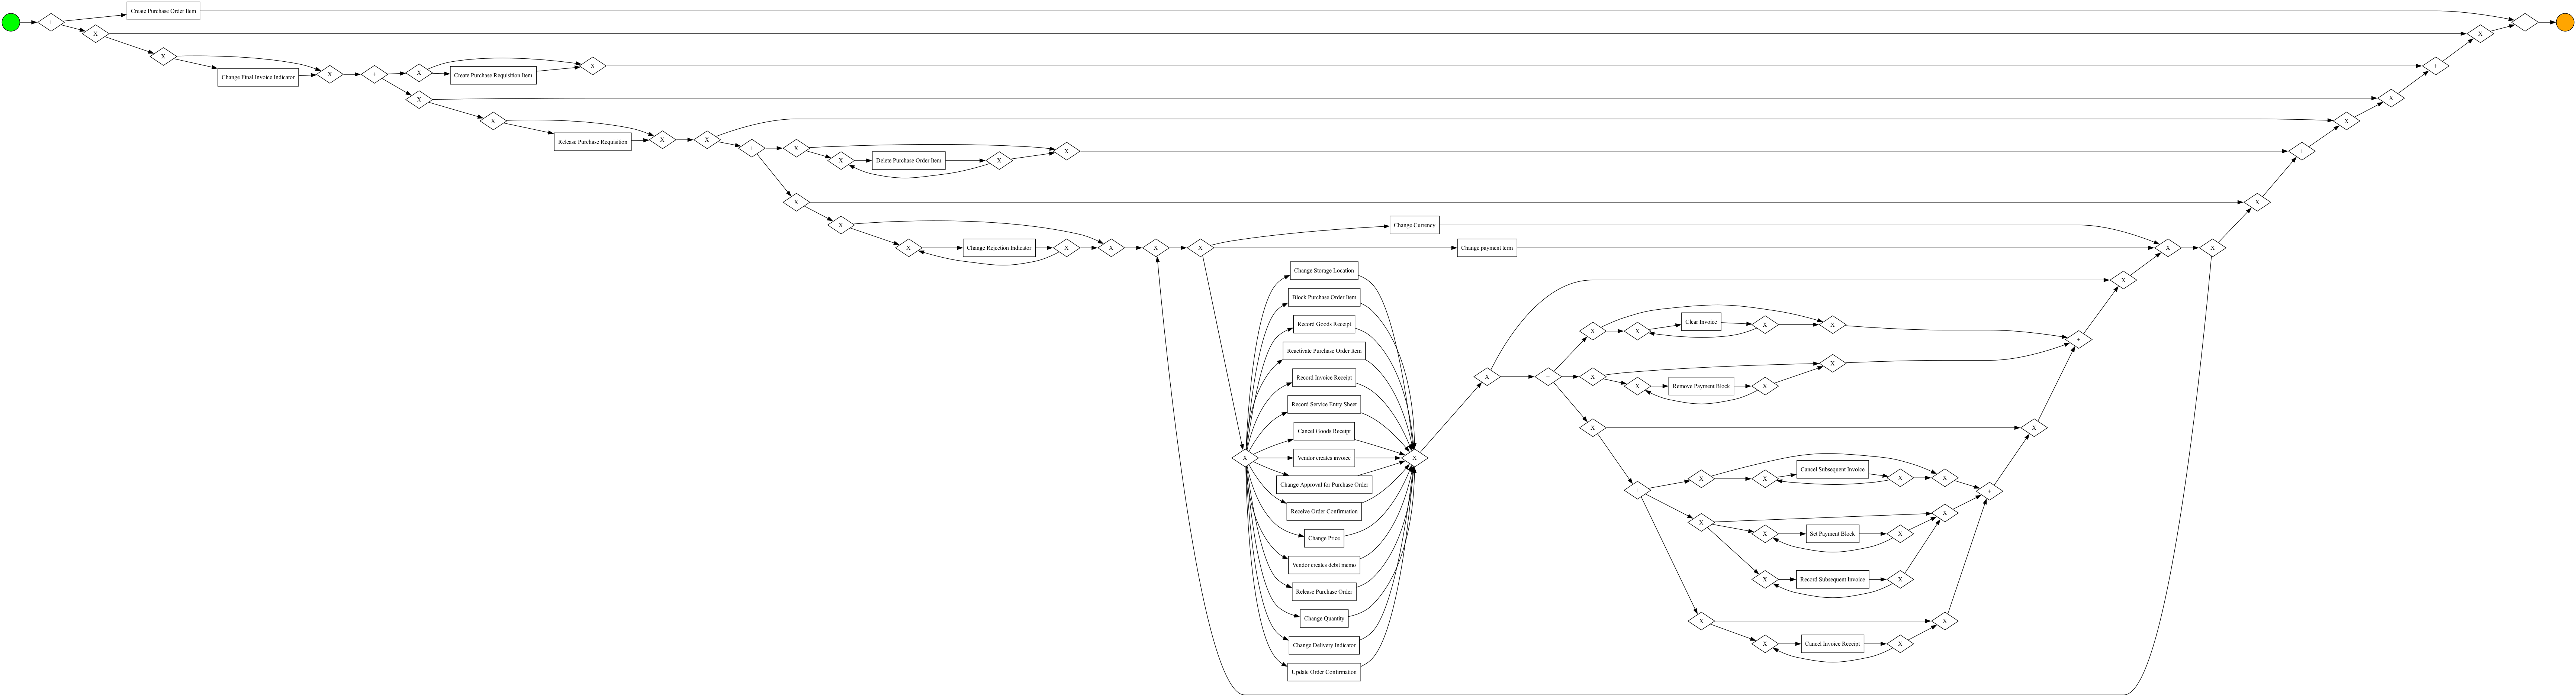

In [8]:
process_tree = pm4py.discover_process_tree_inductive(log)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

replaying log with TBR, completed traces :: 100%|██████████| 11538/11538 [00:30<00:00, 376.80it/s]


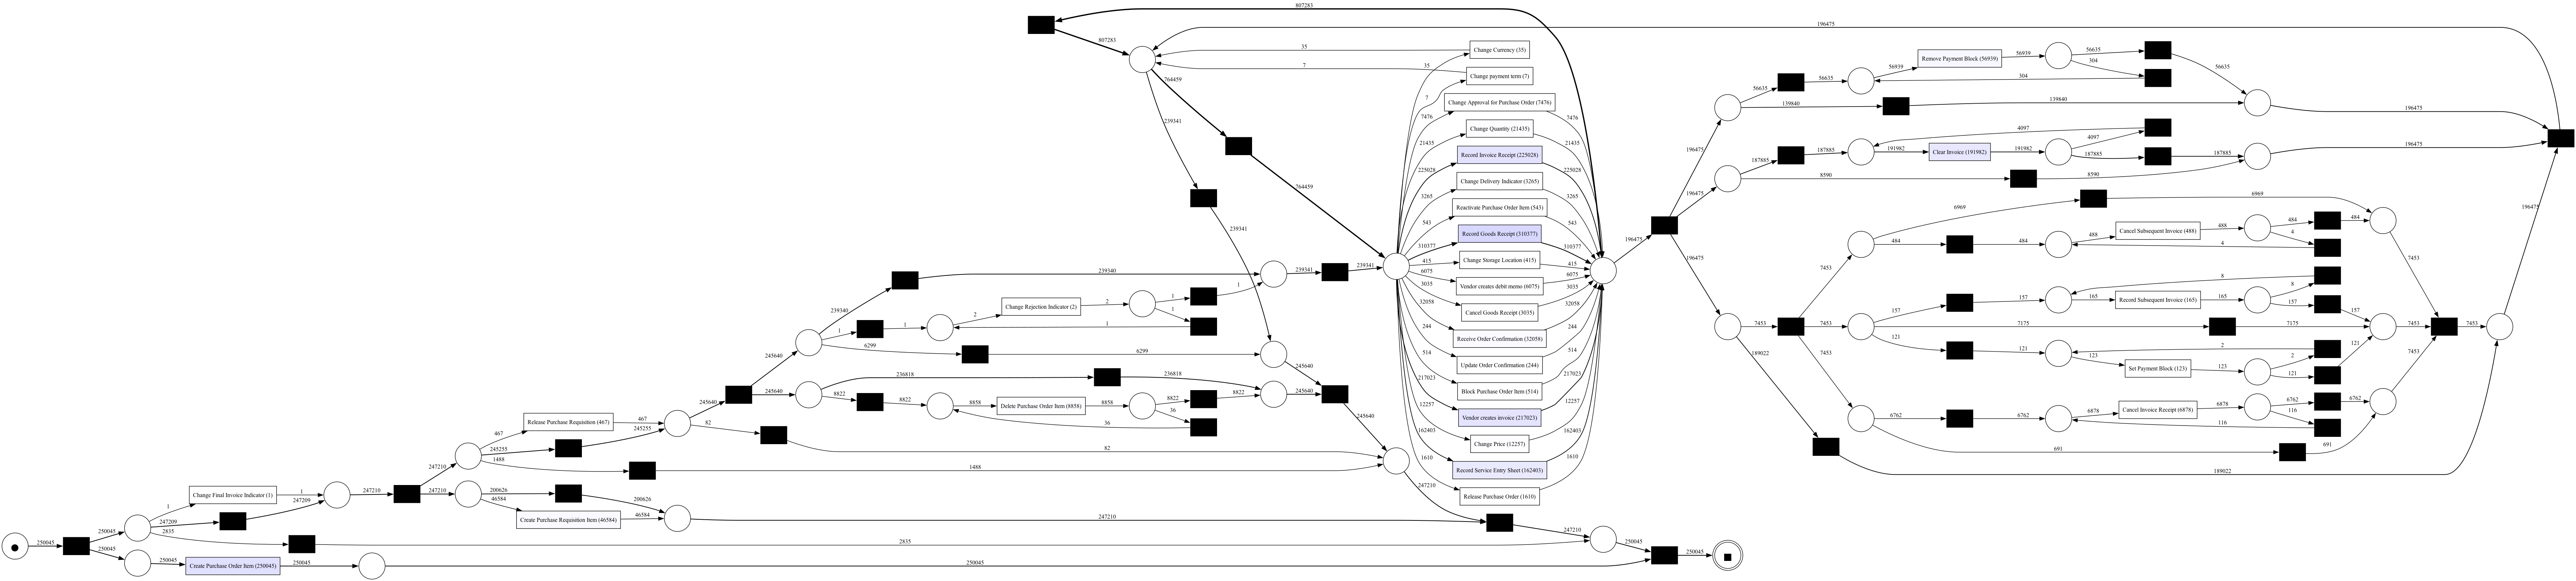

In [11]:
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.visualization.petri_net import visualizer as pn_visualizer

net, im, fm = pt_converter.apply(process_tree)
gviz = pn_visualizer.apply(net, im, fm, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
pn_visualizer.view(gviz)

In [12]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments

replayed_traces = token_replay.apply(log, net, im, fm)

print("REPLAY")
print("Number of traces", len(replayed_traces))

replaying log with TBR, completed traces :: 100%|██████████| 11538/11538 [00:31<00:00, 366.86it/s]


REPLAY
Number of traces 250045


In [13]:
anomalous_traces = []
i = 0
while i < len(replayed_traces):
	if replayed_traces[i]["trace_fitness"] < 1:
		anomalous_traces.append(log[i].attributes["concept:name"])
	i += 1
# print the list as a string
print(', '.join(map(str, anomalous_traces)))
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(replayed_traces))*100 , '%')


Number of anomalous traces  0
Percentage of anomalous traces 0.0 %


In [15]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

fitness = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', fitness)

prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', prec)

gen = generalization_evaluator.apply(log, net, im, fm)
print('Generalization: ', gen)

simp = simplicity_evaluator.apply(net)
print('Simplicity: ', simp)

replaying log with TBR, completed traces :: 100%|██████████| 11538/11538 [00:34<00:00, 333.76it/s]


Fitness:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


replaying log with TBR, completed traces :: 100%|██████████| 192464/192464 [39:19<00:00, 81.59it/s] 


Precision:  0.38223899164704545


replaying log with TBR, completed traces :: 100%|██████████| 11538/11538 [00:31<00:00, 362.65it/s]


Generalization:  0.8969828039725419
Simplicity:  0.5720524017467249
